Importing Libraries

In [50]:
import pandas as pd
import os

Merging 12 months of data into a single file

In [51]:
# files = [file for file in os.listdir('./Sales_Data')]

# df = pd.DataFrame()
# for file in files:
#   mdf = pd.read_csv('./Sales_Data/{0}'.format(file))
#   df = pd.concat([df,mdf])

# df.head()
# df.to_csv("all_data.csv",index =False)

Reading updated dataframe

In [52]:
df = pd.read_csv('all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Clean up the data 

Drop rows of Nan

In [53]:
# df[df['Order Date'].isna()] # true if value is Nan, false otherwise. Boolean indexing -> isna will give an array of the same length of df.['Order Date'] having true/false
# Print rows whose Order Date column is nan

# df.isna() will check each field and then change the value to True or False
# any will check if any value is True over the axis = 1,i.e., rows, and then will return a array of True and False
# nandf will be generated by using boolean indexing on df
# nandf = df[df.isna().any(axis=1)] # rows having atleat 1 Nan value

df = df.dropna(how='all') #Droping rows having all Nans


Find 'or' and delete it

In [54]:
temp_df = df[df['Order Date'].str[0:2] == 'Or']
temp_df

df = df[df['Order Date'].str[0:2] != 'Or'] 

##### Augment data with additional columns

### Adding the month column

In [55]:
df['Month'] = df['Order Date'].str[0:2]
df.Month = df.Month.astype('int16')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add a sales column

In [56]:
# df['Quantity Ordered']=df['Quantity Ordered'].astype('int16') 
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered']) #we don't have to specify the type, correct type will be choosen automaitcally 
# df['Price Each']=df['Price Each'].astype('float16')
df['Price Each']=pd.to_numeric(df['Price Each'])

df['Sales'] = df['Quantity Ordered'] * df['Price Each']

lst=list(df.columns)
lst = lst[0:2]+[lst[-1]]+lst[2:-1]
df = df[lst]

df.head()

,Order ID,Product,Sales,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,23.90,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,99.99,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,600.00,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,11.99,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,11.99,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### What was the best month for sale? How much was earned that month?


In [57]:
results = df.groupby('Month').sum()

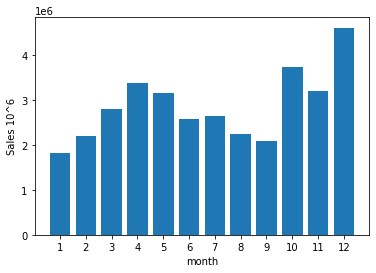

In [59]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results.Sales)
plt.xticks(months)
plt.ylabel('Sales 10^6')
plt.xlabel('month')
plt.show()